# Lecture 4 - Dictionaries and Functions as Arguments (Chapter 5)

## Dictionaries

Dictionaries are lists where the elements are accessed via special names, called keys.

More technically, a dictionary is a set of key:value pairs.  The key is the analog to the index of a list, and is, in effect the name of the item.  Dictionaries are defined using curly braces: { }

In [ ]:
#simple dictionary
days_of_week = {"M":"Monday", "T":"Tuesday",
                "W":"Wednesday", "R":"Thursday",
                "F":"Friday", "S":"Saturday",
                "U":"Sunday"}
print("Key M gives", days_of_week["M"])
print("Key R gives", days_of_week["R"])
#is G a key in days_of_week?
print("G" in days_of_week.keys())

In [9]:
import csv
#create a blank dictionary
element_dict = {}
#this block will only execute if the file opens
with open("ChemicalSymbols.csv") as csvfile:
    chemreader = csv.reader(csvfile)
    for row in chemreader: #have for loop that loops over each line
        element_dict[row[0]] = row[1] #add a key:value pair
    key = input("Enter a valid chemical symbol: ")
    if key in element_dict:
        print(key,"is",element_dict[key])
    else:
        print("Not a valid element")

Enter a valid chemical symbol: Sr
Sr is Strontium


As crazy as it sounds, you can also have dictionaries of dictionaries: the value in the key:value pair can be another dictionary!  Crazy...

In [10]:
#simple dictionary of dictionaries
days_of_week = {"M":{"name":"Monday","weekday":True,"weekend":False},
                "T":{"name":"Tuesday","weekday":True,"weekend":False},
                "W":{"name":"Wednesday","weekday":True,"weekend":False},
                "R":{"name":"Thursday","weekday":True,"weekend":False},
                "F":{"name":"Friday","weekday":True,"weekend":False},
                "S":{"name":"Saturday","weekday":False,"weekend":True},
                "U":{"name":"Sunday","weekday":False,"weekend":True}}
print("The days that are weekdays:")
for day in days_of_week: #for loop over dictionary, loops over keys
    if days_of_week[day]["weekday"] == True:
        print(days_of_week[day]["name"],"is a weekday.")
for day in days_of_week: #for loop over dictionary, loops over keys
    if days_of_week[day]["weekend"] == True:
        print(days_of_week[day]["name"],"is a weekend, whoop.")

The days that are weekdays:
Monday is a weekday.
Tuesday is a weekday.
Wednesday is a weekday.
Thursday is a weekday.
Friday is a weekday.
Saturday is a weekend, whoop.
Sunday is a weekend, whoop.


In [15]:
import csv
element_dict = {} #create a blank dictionary
#this block will only execute if the file opens
with open("ChemicalSymbolsZ.csv") as csvfile:
    chemreader = csv.reader(csvfile)
    #have for loop that loops over each row
    for row in chemreader:
        #add a key:value pair
        element_dict[row[0]]={"symbol":row[1],"name":row[2]}
key = input("Enter a valid atomic number: ")
if key in element_dict:
    print(key,"is",element_dict[key]["symbol"],
          ":",element_dict[key]["name"])
else:
    print("Not a valid element")

Enter a valid atomic number: 6
6 is C : Carbon


We can use the dictionary of dictionaries to develop a function that will compute the product of an alpha decay:

In [16]:
def alpha_decay(Z,A,elements):
    """Alpha decay a nuclide
    Args:
        Z: atomic number of nuclide
        A: mass number of nuclide
        elements: dictionary of elements
        Returns:
            Z and A of daughter nuclide (both ints)
    Side effects:
        Prints a descriptive string of the decay
        """
    newZ = int(Z) - 2 #lose two protons in alpha decay
    newA = int(A) - 4 #lose four nucleons in alpha decay
    print(elements[str(Z)]["name"],"-",A,"(",
          elements[str(Z)]["symbol"],"-",A,"), alpha decays to",
          elements[str(newZ)]["name"],"-",newA,"(",
          elements[str(newZ)]["symbol"],"-",newA,")")
    return newZ,newA

z_value = input("Enter the Z of the nuclide: ")
a_value = input("Enter the mass number of the nuclide: ")
Z,A = alpha_decay(z_value, a_value, element_dict)

Enter the Z of the nuclide: 94
Enter the mass number of the nuclide: 239
Plutonium - 239 ( Pu - 239 ), alpha decays to Uranium - 235 ( U - 235 )


In [17]:
#alpha decay something 10 times
Z = 94
A = 239
for decays in range(10):
    Z,A = alpha_decay(Z, A, element_dict)

Plutonium - 239 ( Pu - 239 ), alpha decays to Uranium - 235 ( U - 235 )
Uranium - 235 ( U - 235 ), alpha decays to Thorium - 231 ( Th - 231 )
Thorium - 231 ( Th - 231 ), alpha decays to Radium - 227 ( Ra - 227 )
Radium - 227 ( Ra - 227 ), alpha decays to Radon - 223 ( Rn - 223 )
Radon - 223 ( Rn - 223 ), alpha decays to Polonium - 219 ( Po - 219 )
Polonium - 219 ( Po - 219 ), alpha decays to Lead - 215 ( Pb - 215 )
Lead - 215 ( Pb - 215 ), alpha decays to Mercury - 211 ( Hg - 211 )
Mercury - 211 ( Hg - 211 ), alpha decays to Platinum - 207 ( Pt - 207 )
Platinum - 207 ( Pt - 207 ), alpha decays to Osmium - 203 ( Os - 203 )
Osmium - 203 ( Os - 203 ), alpha decays to Tungsten - 199 ( W - 199 )


Another example: keeping data about different nuclear fuel types.  Two fuel types: LEU (low enriched uranium) and HEU (highly enriched uranium)...

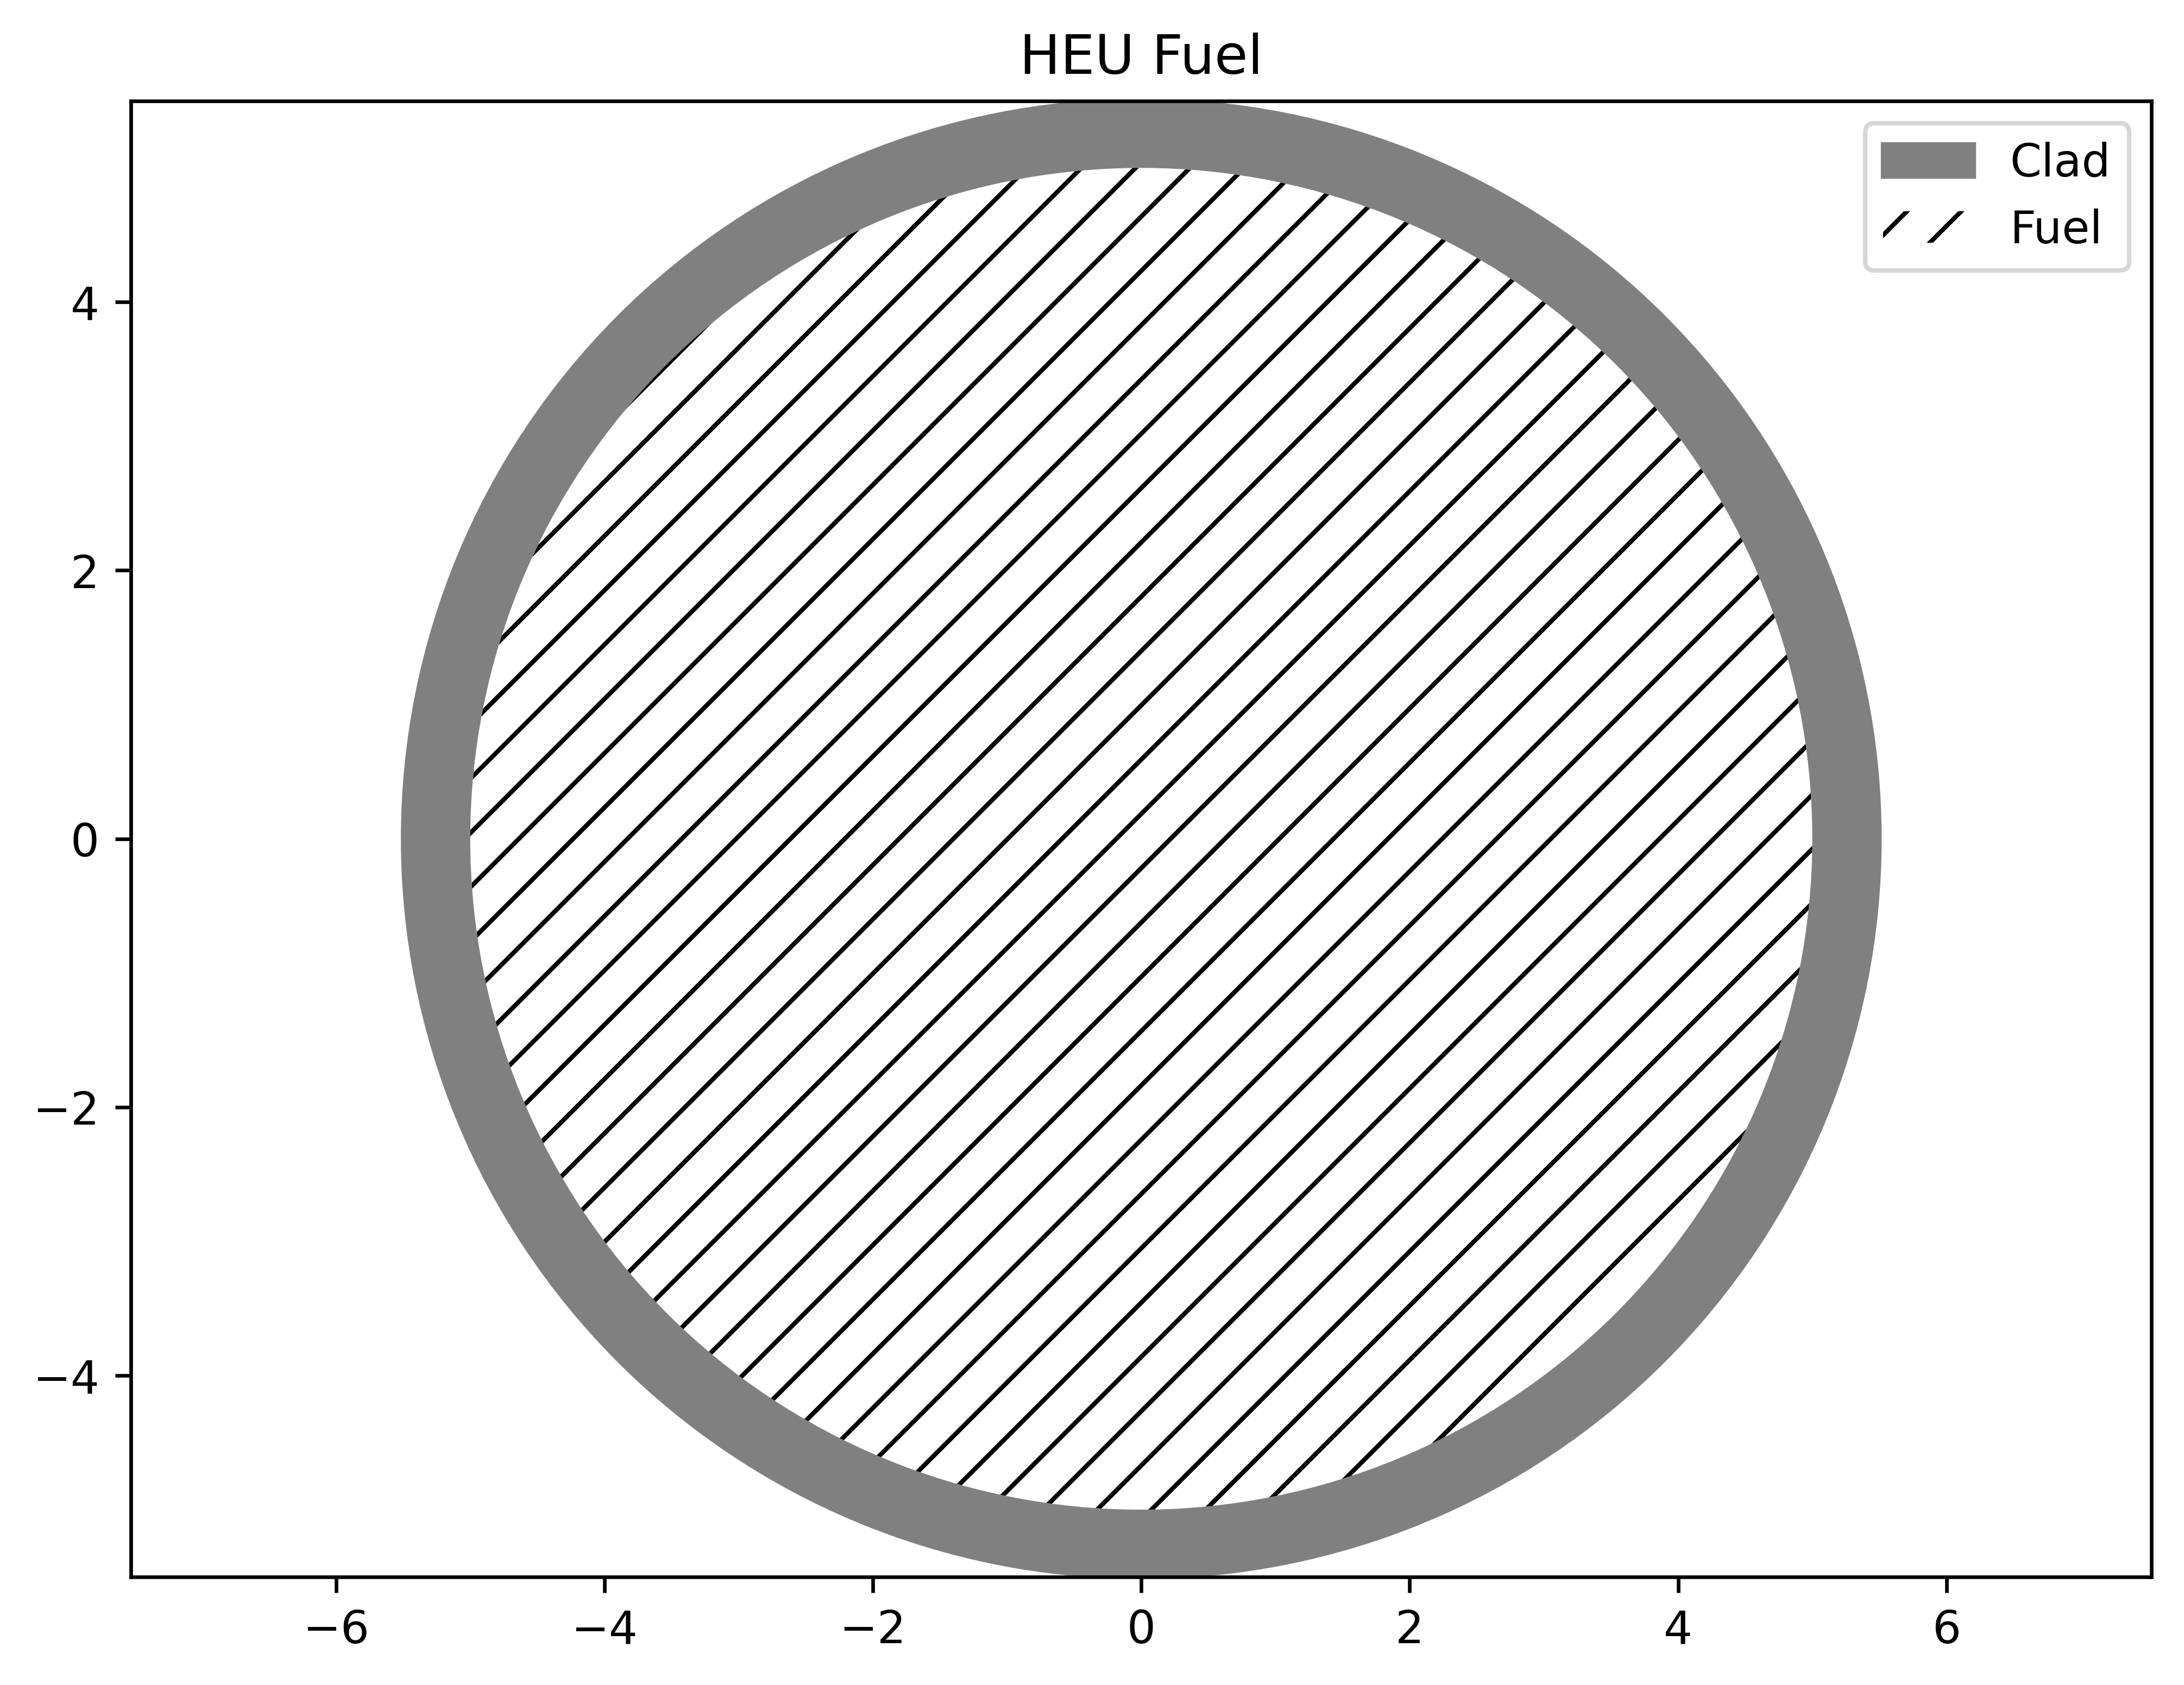

In [25]:
import matplotlib.pyplot as plt
fuel_types = {}
fuel_types["heu"] = {"fuel":{"nu sigma_f":12.0,
                             "D":3.0, "thickness":5.0},
                     "clad":{"nu sigma_f":0.0, 
                             "D":300.0, "thickness":0.5}}
fuel_types["leu"] = {"fuel":{"nu sigma_f":8.5,
                             "D":1.25, "thickness":4.25},
                     "clad":{"nu sigma_f":0.0,
                             "D":300.0, "thickness":1.25}}
#plot heu
#heu fuel
fuel_radius = fuel_types["heu"]["fuel"]["thickness"]
clad_radius = fuel_radius + fuel_types["heu"]["clad"]["thickness"]
fuel = plt.Circle((0,0),fuel_radius,
                  facecolor="white",label="Fuel", hatch="//")
clad = plt.Circle((0,0),clad_radius,color="gray",label="Clad")
fig = plt.figure(figsize=(8,6), dpi=600)
plt.gca().add_patch(clad)
plt.gca().add_patch(fuel)
plt.title("HEU Fuel")
plt.axis("equal")
plt.legend()
plt.axis([-clad_radius,clad_radius,-clad_radius,clad_radius])
plt.show();

We can do the same thing for the LEU fuel:

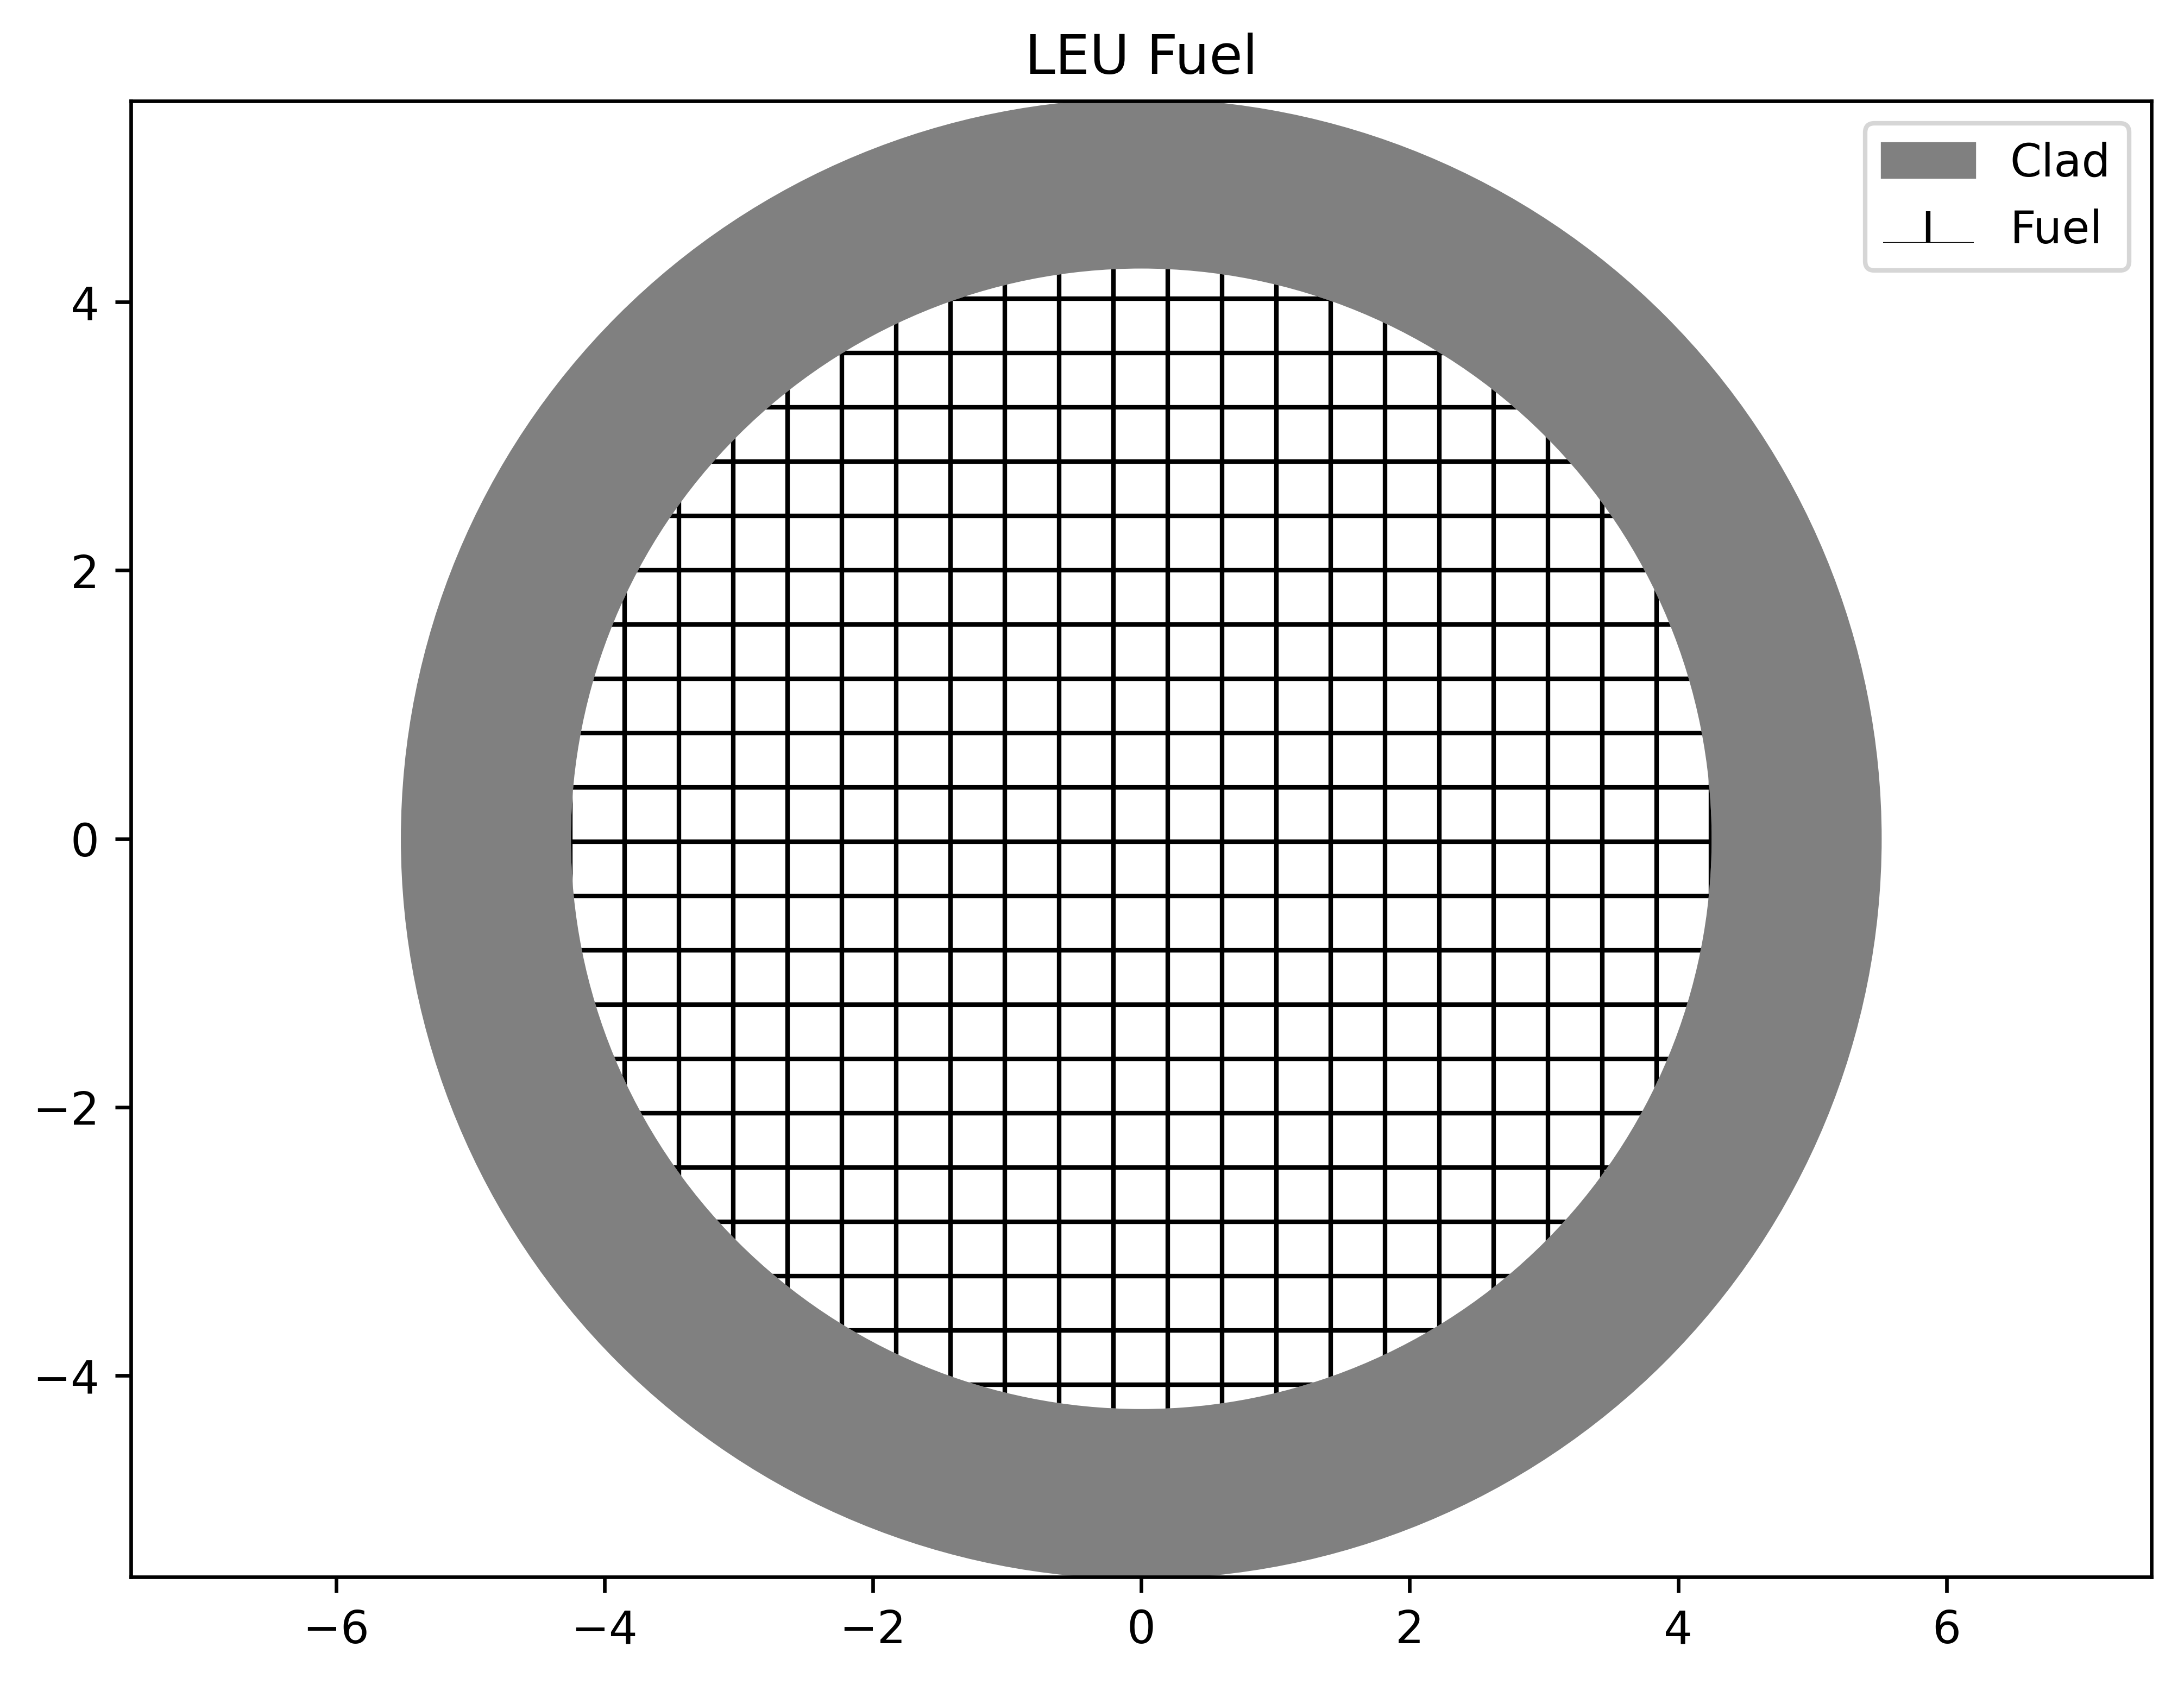

In [26]:
fuel_radius = fuel_types["leu"]["fuel"]["thickness"]
clad_radius = fuel_radius + fuel_types["leu"]["clad"]["thickness"]
fig = plt.figure(figsize=(8,6), dpi=600)
fuel = plt.Circle((0,0),fuel_radius,
                  facecolor="white",label="Fuel", hatch="+")
clad = plt.Circle((0,0),clad_radius,color="gray",label="Clad")
plt.gca().add_patch(clad)
plt.gca().add_patch(fuel)
plt.title("LEU Fuel")
plt.axis("equal")
plt.legend()
plt.axis([-clad_radius,clad_radius,-clad_radius,clad_radius])
plt.show();

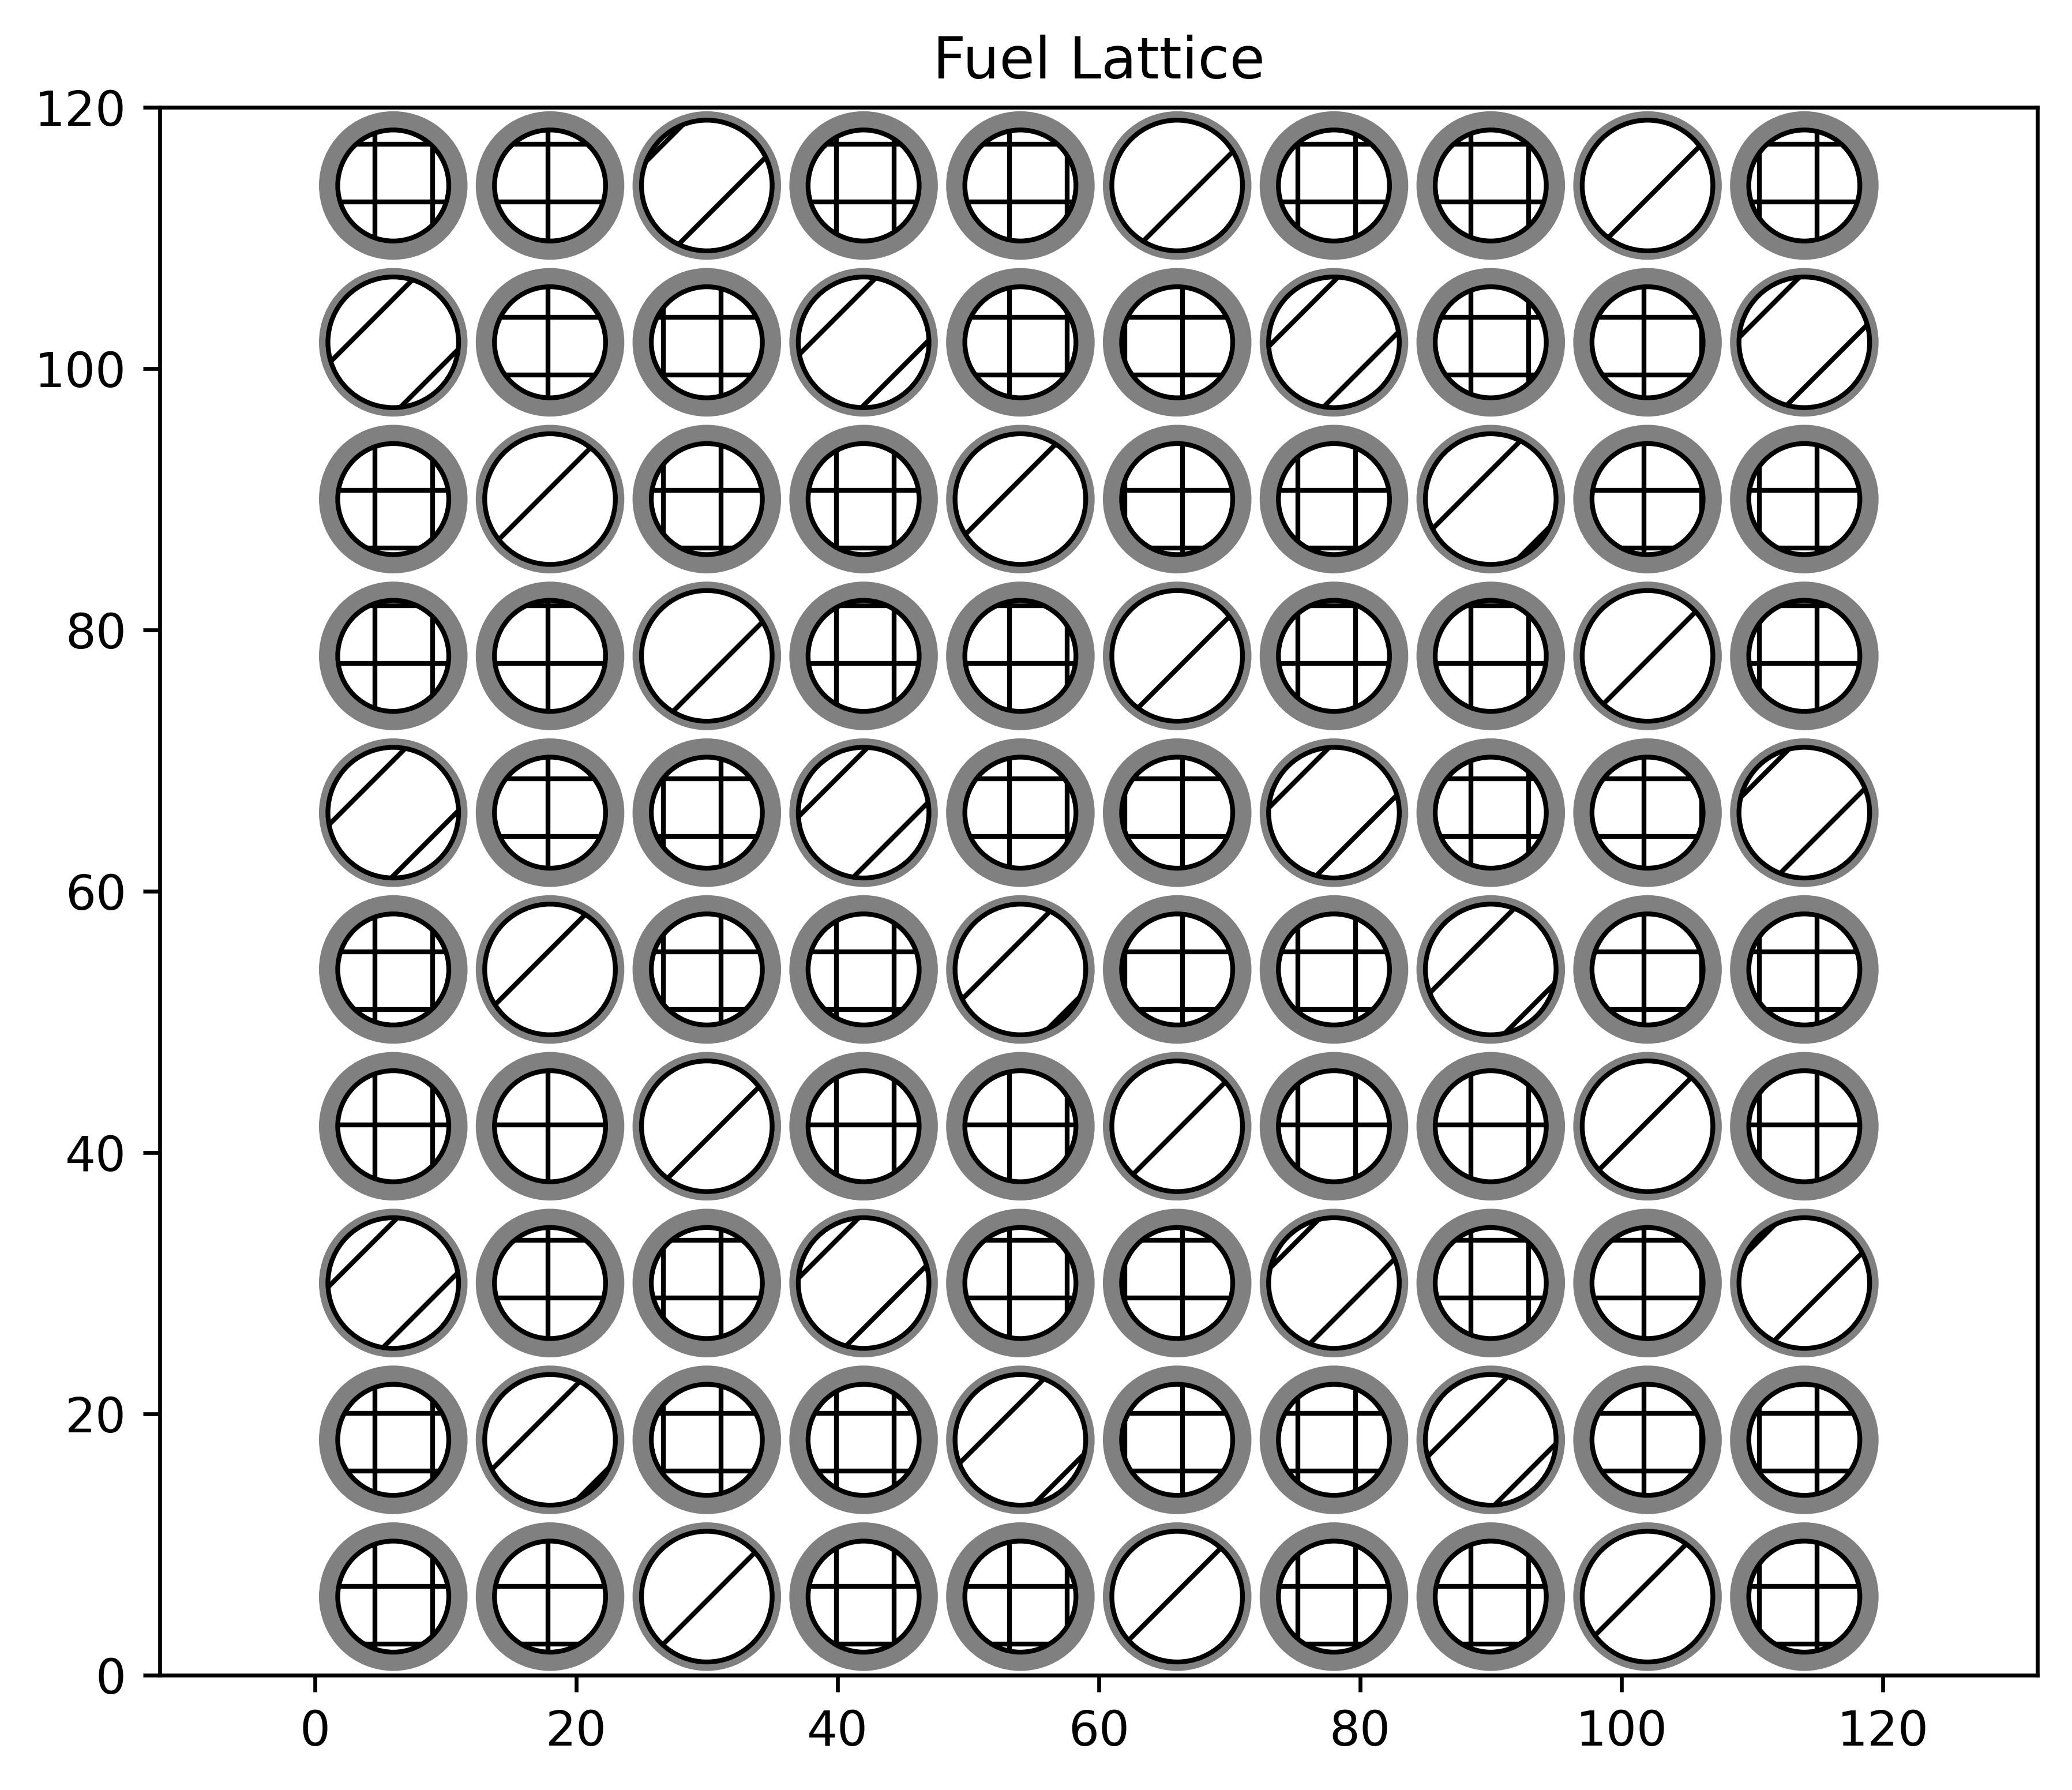

In [30]:
import numpy as np
fuel_placements = {}
#10 x 10 lattice with 0.5 cm spacing
#every third pin is heu
x = np.arange(6.,120,12)
y = np.arange(6.,120,12)
fig = plt.figure(figsize=(7,6), dpi=600)
count = 1 #set up counting variable
for i in x:
    for j in y:
        if not(count % 3): #if count mod 3 is 0, then heu
            pin_type = "heu"
            hatch = "/"
        else: #else leu
            pin_type = "leu"
            hatch = "+"
        fuel_radius = fuel_types[pin_type]["fuel"]["thickness"]
        clad_radius = fuel_radius + fuel_types[pin_type]["clad"]["thickness"]
        fuel = plt.Circle((i,j),fuel_radius,facecolor="white",
                          edgecolor="black",hatch=hatch,
                          label="Fuel")
        clad = plt.Circle((i,j),clad_radius,color="gray",label="Clad")
        plt.gca().add_patch(clad)
        plt.gca().add_patch(fuel)
        count += 1 #increment count
plt.title("Fuel Lattice")
plt.axis("equal")
plt.axis([0,120,0,120])
plt.show();

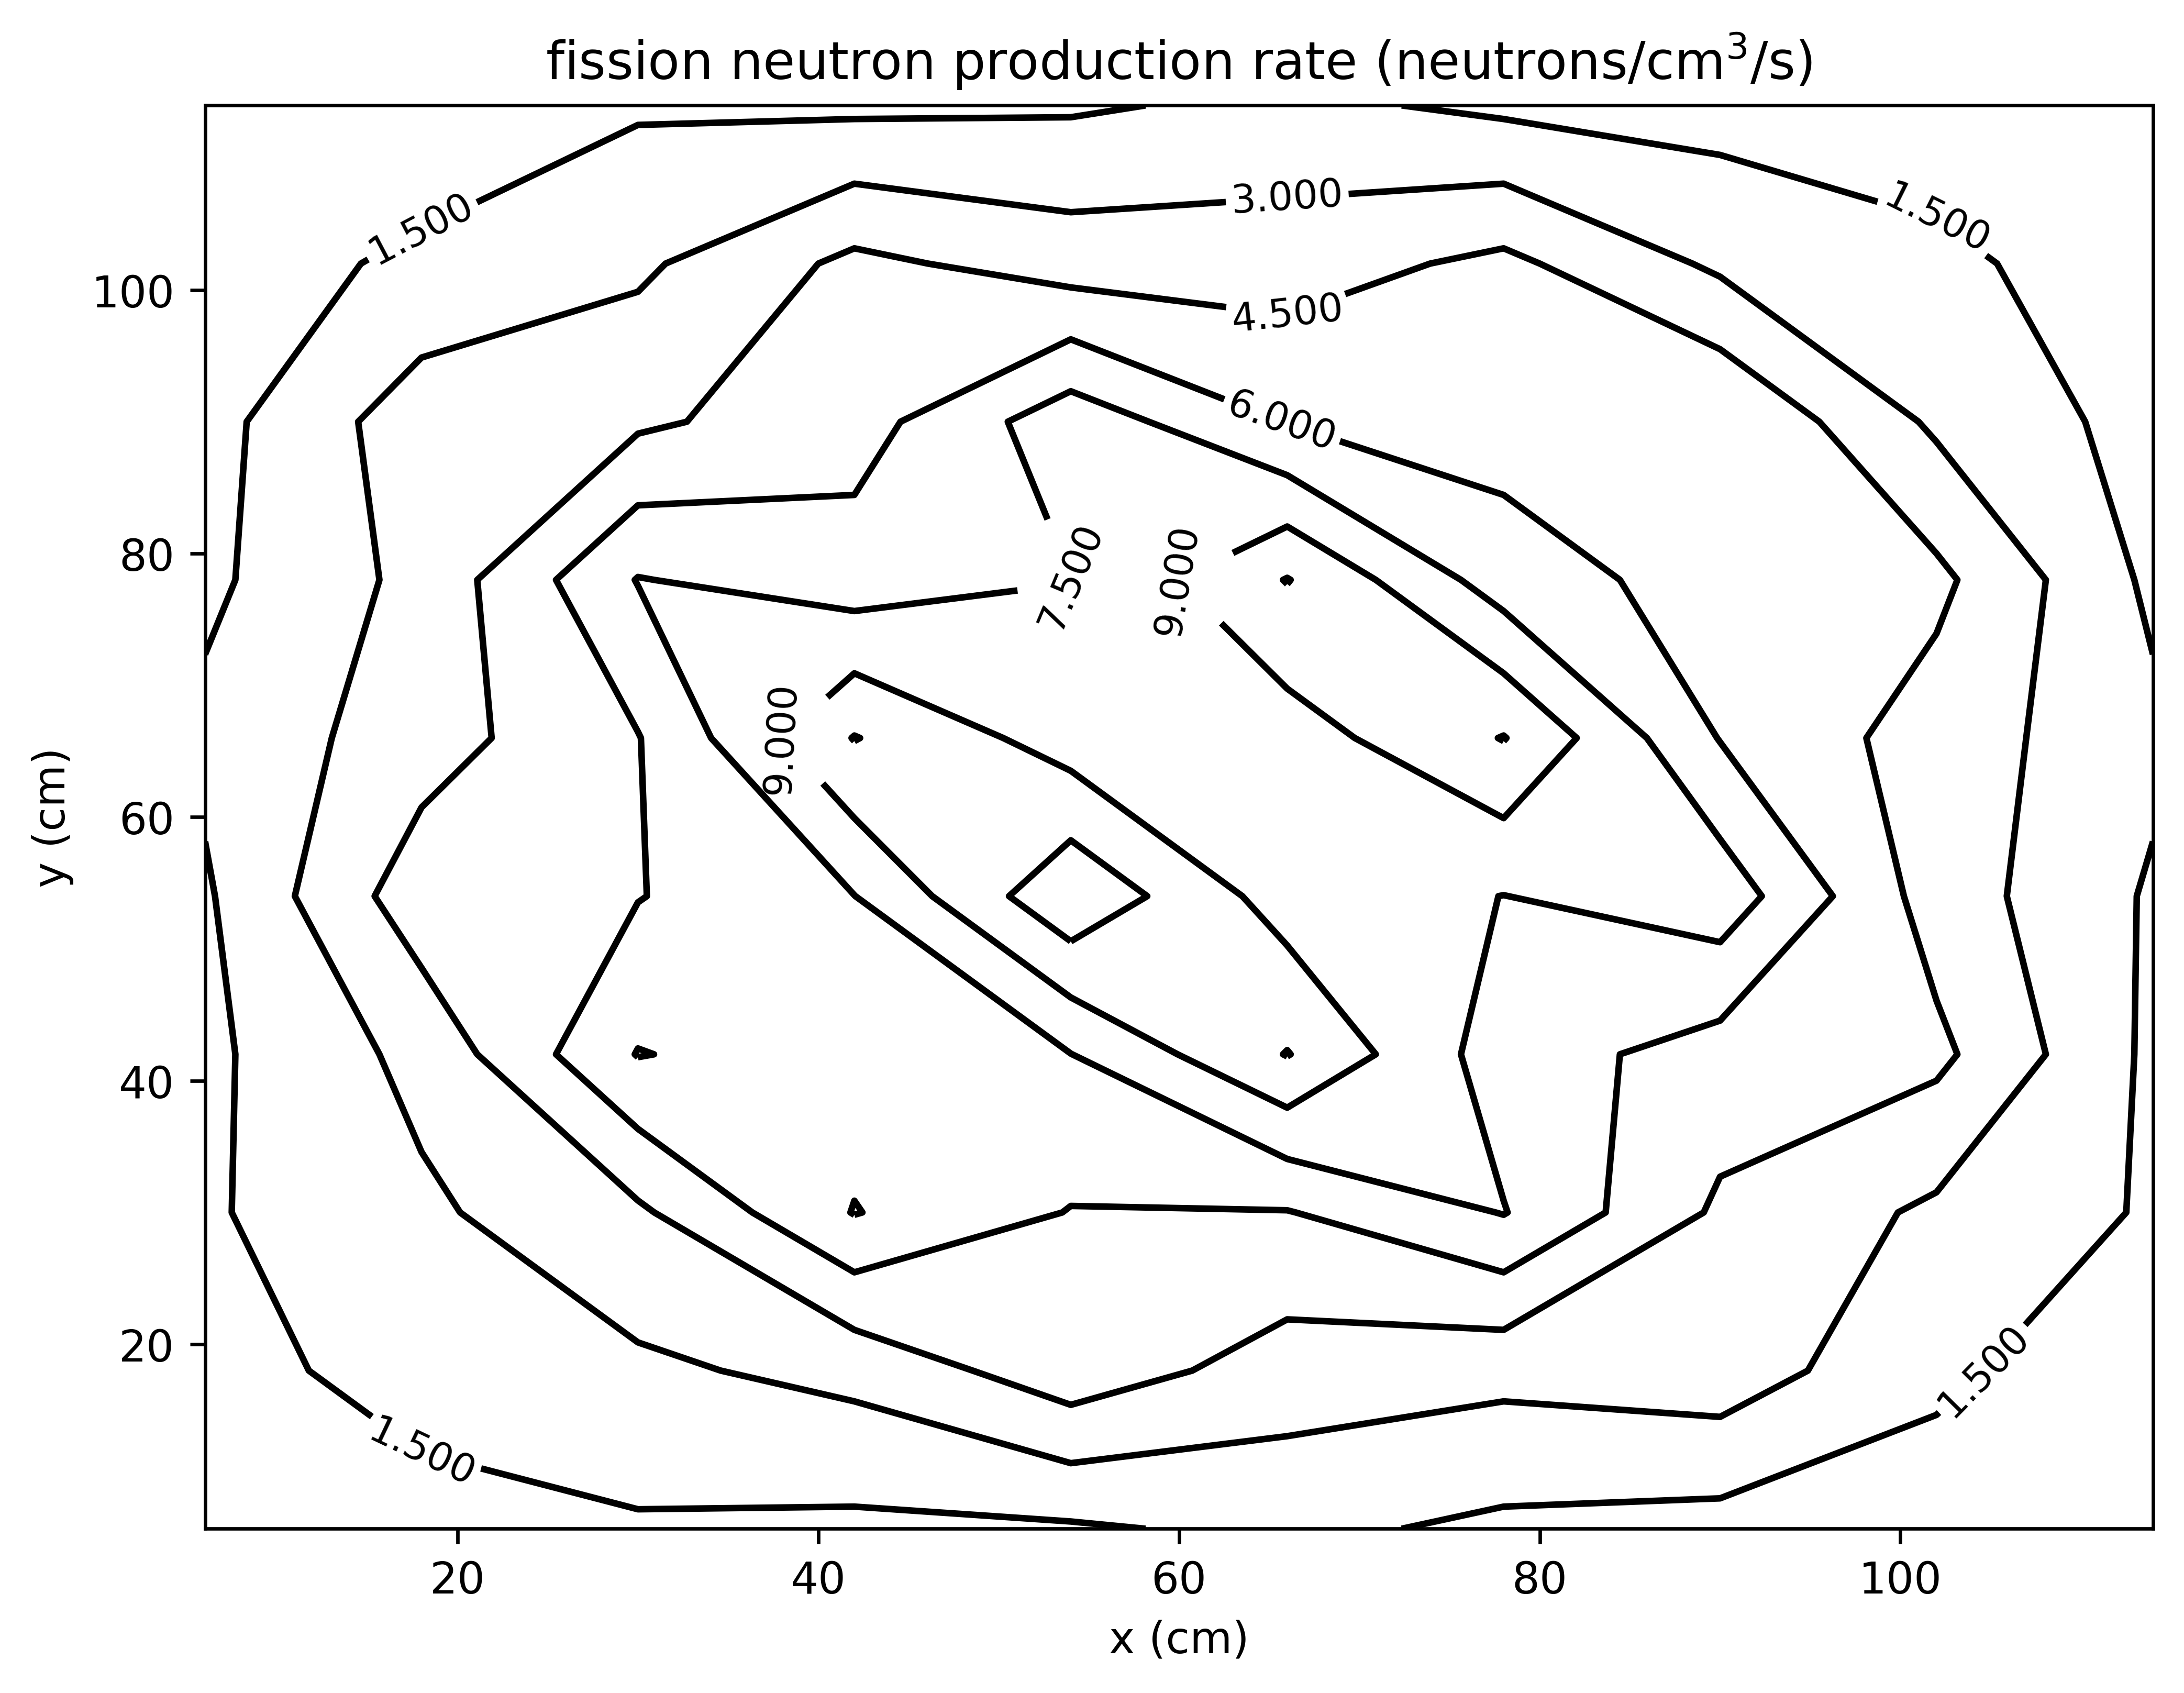

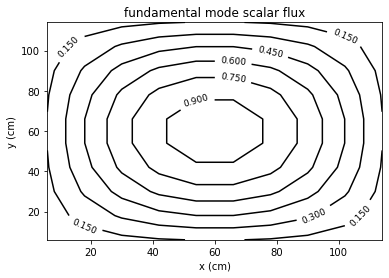

In [31]:
fuel_placements = {}
#10 x 10 lattice with 0.5 cm spacing
#every third pin is heu
x = np.arange(6.,120,12)
y = np.arange(6.,120,12)
fig = plt.figure(figsize=(8,6), dpi=600)
X = np.zeros((x.size, x.size))
Y = X.copy()
Z = X.copy()
Zflux = Z.copy()
row = 0
col = 0
count = 1
for i in x:
    for j in y:
        if not(count % 3): #if count mod 3 is 0, then heu
            pin_type = "heu"
        else: #else leu
            pin_type = "leu"
        nusigf = fuel_types[pin_type]["fuel"]["nu sigma_f"]
        X[row,col] = i
        Y[row,col] = j
        Z[row,col]=nusigf*np.sin(i*np.pi/120)*np.sin(j*np.pi/120)
        Zflux[row,col]=np.sin(i*np.pi/120)*np.sin(j*np.pi/120)
        row += 1 #increment row
        count += 1 #increment count
    col += 1 #increment column
    row = 0
    
CS = plt.contour(X,Y,Z, colors="k")
plt.clabel(CS, fontsize=9, inline=1)
plt.xlabel("x (cm)");
plt.ylabel("y (cm)");
plt.title("fission neutron production rate (neutrons/cm$^3$/s)");
plt.show();
CS = plt.contour(X,Y,Zflux, colors="k")
plt.clabel(CS, fontsize=9, inline=1)
plt.xlabel("x (cm)");
plt.ylabel("y (cm)");
plt.title("fundamental mode scalar flux");
plt.show();

## Functions passed to functions

In the example below, we are going to perform the integral of a function $f$ over the range between $a$ and $b$ using the midpoint, or rectangle rule of integration.  Break the domain $\left[a,b\right]$ into a finite number of intervals and evaluate the function at the midpoint of the interval.  Multiply the function evaluation by $\Delta x$, and sum over all the intervals to approximate the integral (area under the curve...).

In [2]:
def midpoint_rule(f,a,b,num_intervals):
    """integrate function f using the midpoint rule
    Args:
        f: function to be integrated, it must take 1 argument
        a: lower bound of integral range
        b: upper bound of integral range
        num_intervals: the number of intervals in [a,b]
    Returns:
        estimate of the integral
    """
    L = (b-a) #how big is the range
    dx = L/num_intervals #how big is each interval
    #midpoints are a+dx/2, a+3dx/2, ..., b-dx/2
    midpoints = np.arange(num_intervals)*dx+0.5*dx+a
    integral = 0
    for point in midpoints:
        integral = integral + f(point)
    return integral*dx

In [4]:
# we'll pass the np.sin function in as the first argument...
import numpy as np
print(midpoint_rule(np.sin,0,np.pi,10))

2.0082484079079745


We can see how rapidly the error in this algorithm decreases as we make increase the number of intervals, decreasing the $\Delta x$...

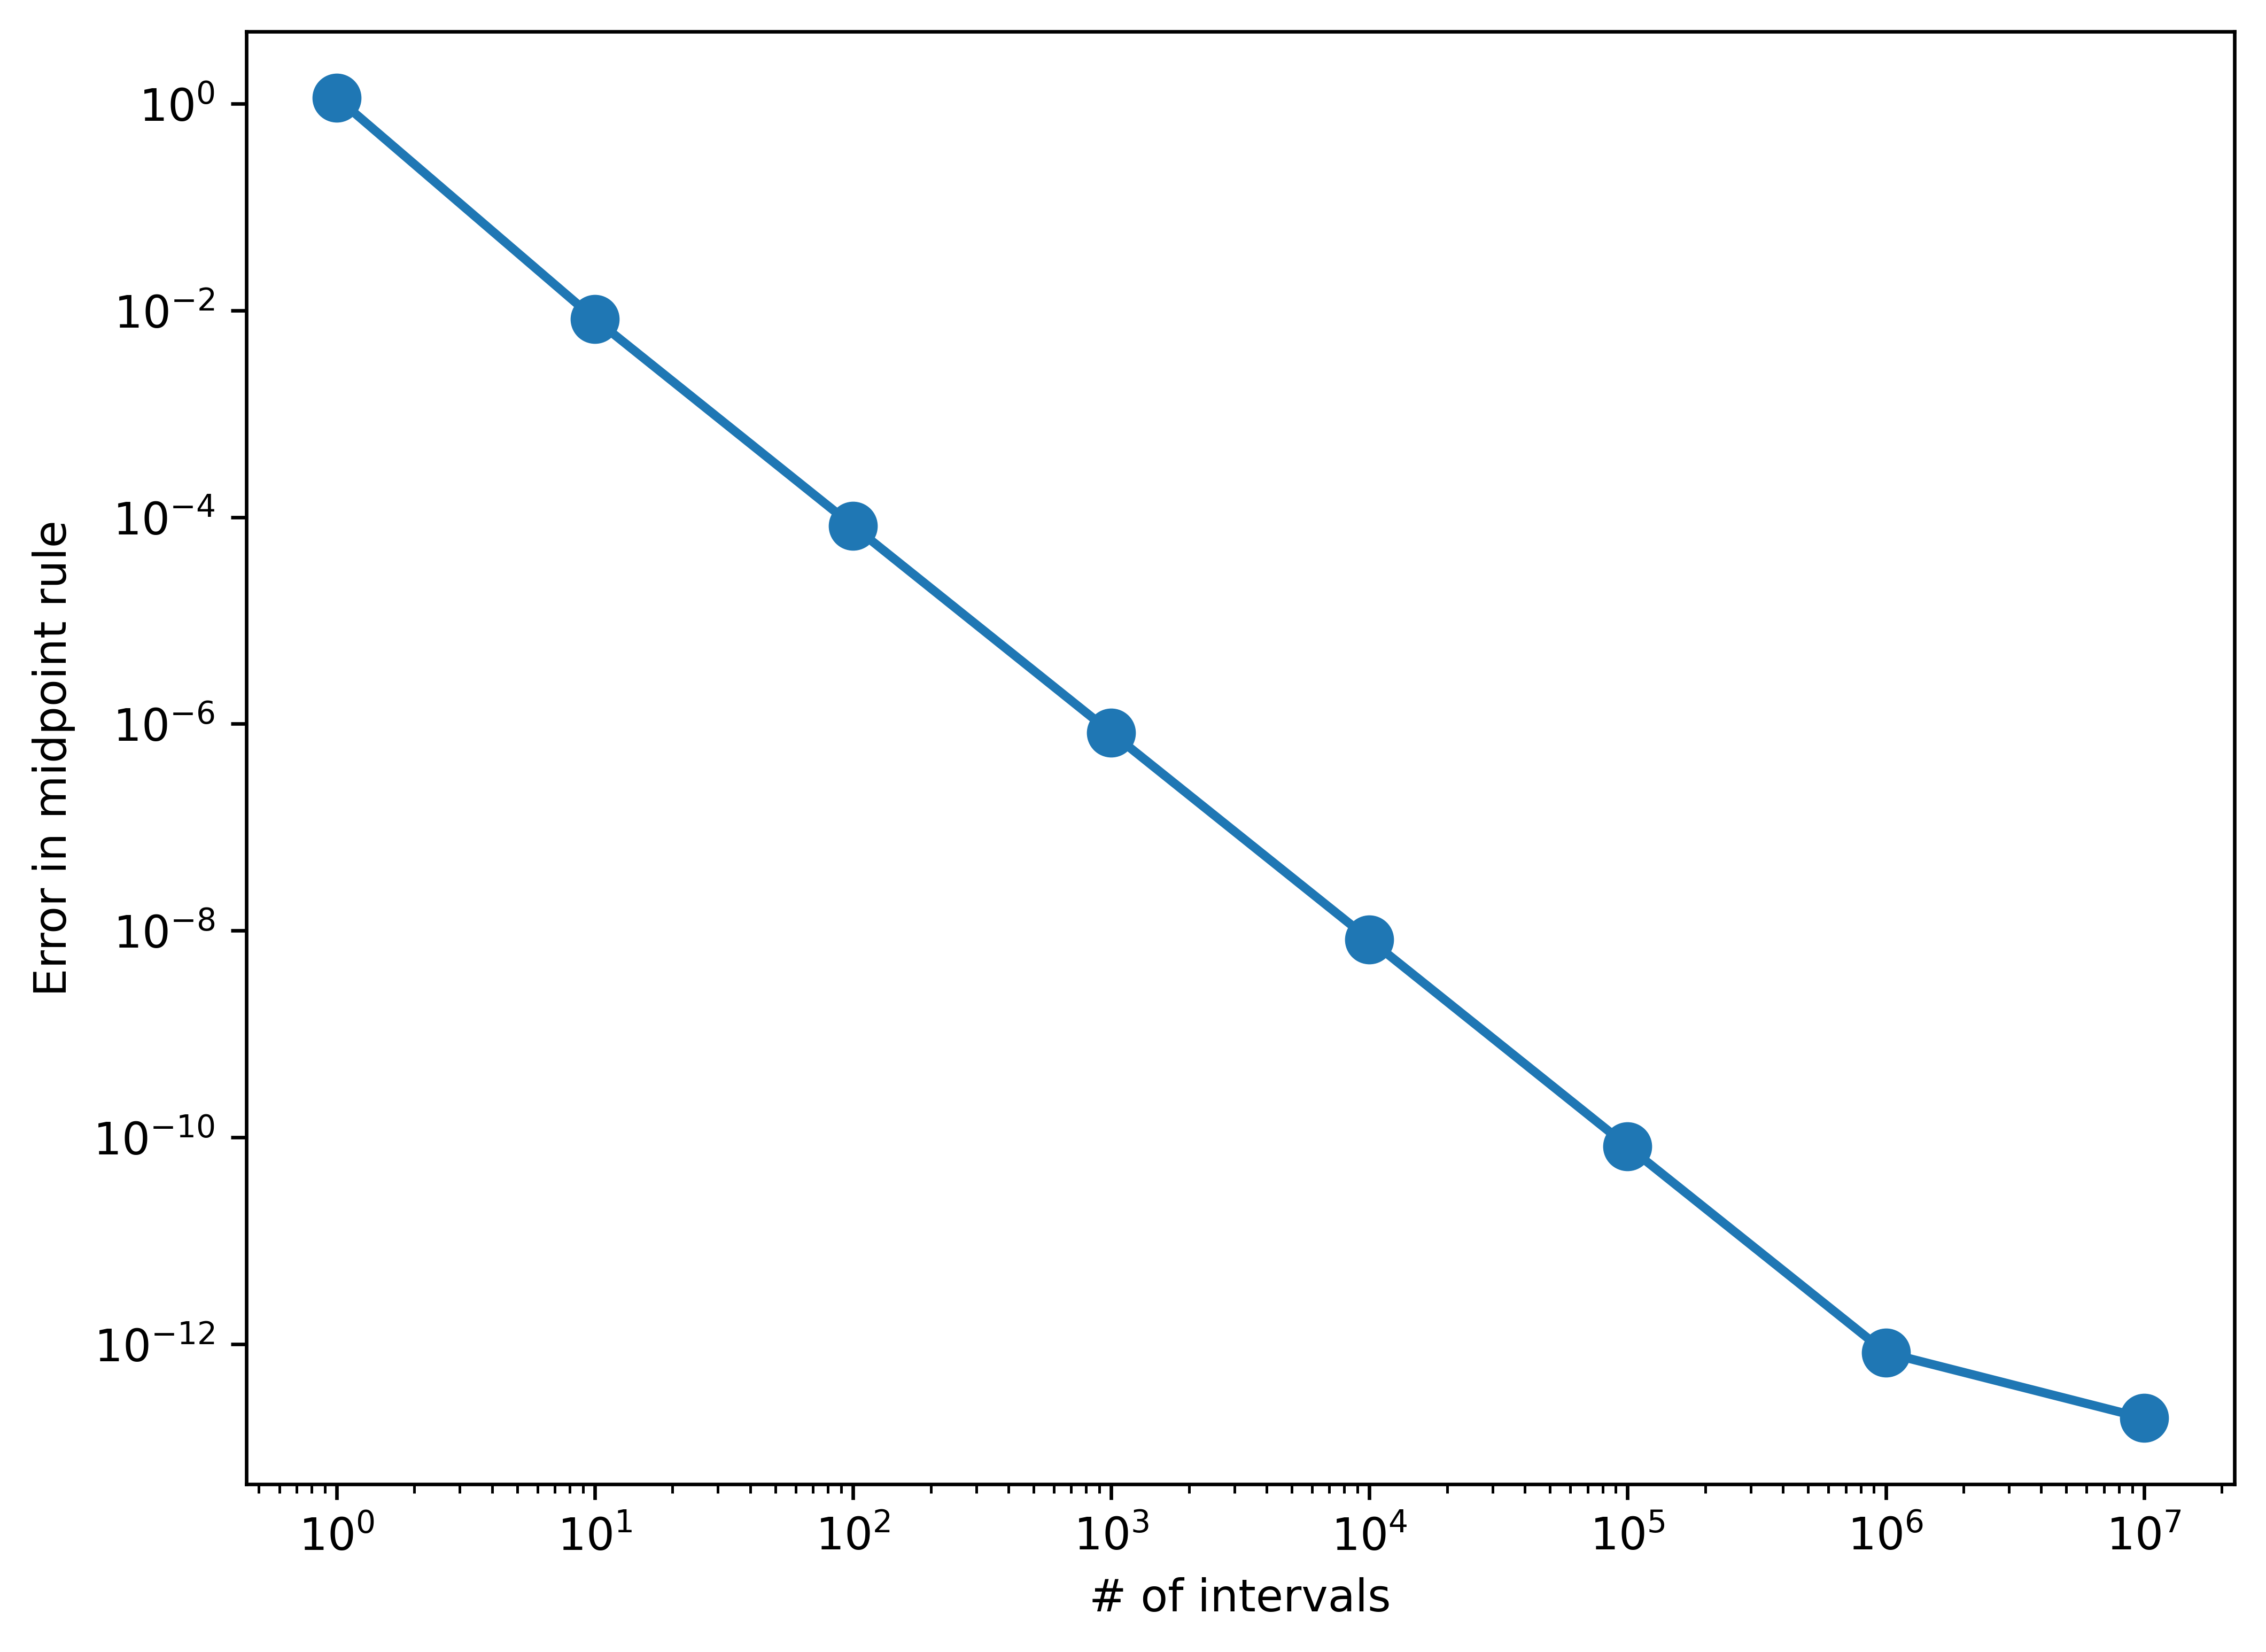

In [7]:
import matplotlib.pyplot as plt
num_intervals = 8 #number of interval sizes
#run several different intervals
intervals = 10**np.arange(num_intervals)
error = np.zeros(num_intervals)
fig = plt.figure(figsize=(8,6), dpi=600)
count = 0
a = 0
b = np.pi
for interval in intervals:
    error[count] = np.fabs(midpoint_rule(np.sin,a,b,interval)-2)
    count += 1
plt.loglog(intervals,error,marker="o",
           markersize = 10,linewidth=2);
plt.xlabel("# of intervals")
plt.ylabel("Error in midpoint rule")
plt.show()

We can define our own functions and pass them to the midpoint rule function we defined.  For example, the Exponential Integral function:

$$ E_n (x) = \int\limits_1^{\infty} dt \frac{e^{-xt}}{t^n} $$

In [8]:
def exp_int_argument(t,n=1,x=1):
    return np.exp(-x*t)/t**n
num_points = 10**6
upper_bound = 1000
print("Exact answer is 0.2193839343")
print("Our approximation with upper bound",upper_bound,
      "and",num_points,
      "points is",
      midpoint_rule(exp_int_argument,1,upper_bound,num_points))

Exact answer is 0.2193839343
Our approximation with upper bound 1000 and 1000000 points is 0.21938390380017958


We can employ Matplotlib to illustrate the midpoint rule for integration...

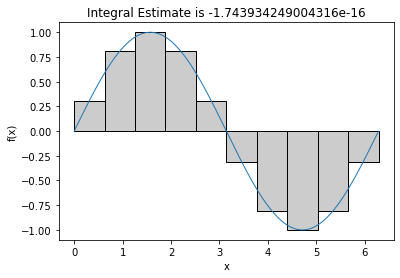

-1.743934249004316e-16

In [10]:
def midpoint_rule_graphical(f,a,b,num_intervals):
    """integrate function f using the midpoint rule
    Args:
        f: function to be integrated, it must take one argument
        a: lower bound of integral range
        b: upper bound of integral range
        num_intervals: the number of intervals to break [a,b] into
    Returns:
        estimate of the integral
    Side Effect:
        Plots intervals and areas of midpoint rule
    """
    fig = plt.figure()
    ax = plt.subplot(111)
    L = (b-a) #how big is the range
    dx = L/num_intervals #how big is each interval
    midpoints = np.arange(num_intervals)*dx+0.5*dx+a
    x = midpoints
    y = np.zeros(num_intervals)
    integral = 0
    count = 0
    for point in midpoints:
        y[count] = f(point)
        integral = integral + f(point)
        verts = [(point-dx/2,0)] + [(point-dx/2,f(point))]
        verts += [(point+dx/2,f(point))] + [(point+dx/2,0)]
        poly = plt.Polygon(verts, facecolor="0.8", edgecolor="k")
        ax.add_patch(poly)
        count += 1
    y = f(x)
    smooth_x = np.linspace(a,b,10000)
    smooth_y = f(smooth_x)
    plt.plot(smooth_x, smooth_y, linewidth=1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Integral Estimate is " + str(integral*dx))
    plt.show()
    return integral*dx

midpoint_rule_graphical(np.sin,0,2*np.pi,10)

Answer is 0.2193839343


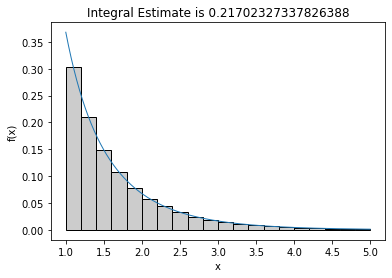

Our approximation with upper bound 5 and 20 points is 0.21702327337826388


In [12]:
num_points = 20
upper_bound = 5
print("Answer is 0.2193839343")
print("Our approximation with upper bound",upper_bound,
      "and",num_points,"points is",
      midpoint_rule_graphical(exp_int_argument,1,upper_bound,num_points))

## Lambda functions

These are simple, one line functions. Important difference: lambda functions
give you access to all the variables available in the scope they are defined. This means
that lambda functions do not have their own variable scope.

The line at x = 0 is 1.0
The line at x = 1 is 3.0
The line at x = 2 is 5.0


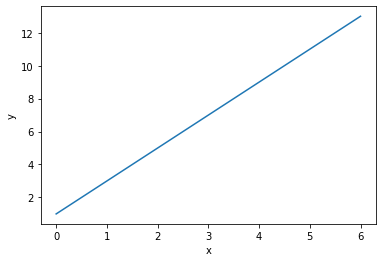

In [15]:
simple_line = lambda x: 2.0*x + 1.0
print("The line at x = 0 is", simple_line(0))
print("The line at x = 1 is", simple_line(1))
print("The line at x = 2 is", simple_line(2))
x = np.linspace(0,6,50)
y = simple_line(x)
plt.plot(x,y)
plt.ylabel("y")
plt.xlabel("x")
plt.show()

Here we define the probability density function of a Gaussian as the integrand. A unit variance and zero
mean Gaussian is given by:

$$ f(x) = \frac{e^{-x^2}}{\sqrt{\pi}} $$

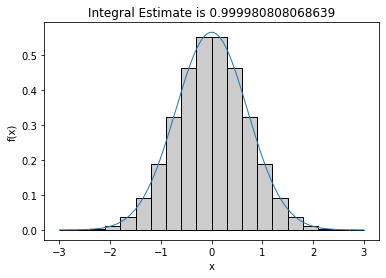

0.999980808068639

In [16]:
#function to compute gaussian
gaussian = lambda x: np.exp(-x**2)/np.sqrt(np.pi)
midpoint_rule_graphical(gaussian,-3,3,20)

We can trick our midpoint integration scheme into performing two dimensional integrals by observing that:

$$\int\limits_{a_y}^{b_y} dy \int\limits_{a_x}^{b_x} dx f(x,y) = \int\limits_{a_y}^{b_y} dy g(y), $$

where 

$$g(y) = \int\limits_{a_x}^{b_x} dx f(x,y). $$

We can use slightly modify our existing midpoint code and use a lambda function to compute an approximation to:

$$ \int\limits_{0}^{\pi} dy \int\limits_{0}^{\pi} dx \sin{(x)} \sin{(y)} = 4. $$

In [17]:
def midpoint_2D(f,ax,bx,ay,by,num_intervals_x,num_intervals_y):
    """integrate function f(x,y) using the midpoint rule
    Args:
        f: function to be integrated, it must take 2 arguments
        ax: lower bound of integral range in x
        bx: upper bound of integral range in x
        ay: lower bound of integral range in y
        by: upper bound of integral range in y
        num_intervals_x: the number of intervals in x
        num_intervals_y: the number of intervals in y
    Returns:
        estimate of the integral
    """
    g = lambda y: midpoint_rule(lambda x: f(x,y),ax,bx,num_intervals_x)
    return midpoint_rule(g,ay,by,num_intervals_y)

sin2 = lambda x,y:np.sin(x)*np.sin(y)
print("Estimate of the integral of sin(x)sin(y), over [0,pi] x [0,pi] is",
midpoint_2D(sin2,0,np.pi,0,np.pi,1000,1000))

Estimate of the integral of sin(x)sin(y), over [0,pi] x [0,pi] is 4.000003289869756


The lambda functions in this example tell Python to treat only a single variable as the
function parameter, and evaluate everything else based on the current scope:

$\texttt{lambda x: f(x,y)}$ evaluates $\texttt{f(x,y)}$ using whatever the current value of y is and the parameter x that the function was passed. 

The value of y is supplied by a parameter to the lambda function g.

The intricacies of defining lambda functions inside other lambda functions can get a bit
abstract, but remembering that they treat all variables in an expression that is not specified in
the parameter list as “known”, is the key to understanding how they function.